In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib widget

In [3]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

import gauge_proc_tools
import gauge_vis_tools

# Load data from three colocated gauges. 

These David tiping bucket rain gauges have been installed approx. 1 meter apart from each other.

In [4]:
df_raw = pd.read_csv('example_data.csv.gz', parse_dates=True, index_col=0)
df_raw

,1,2,3
time_UTC,,,
2019-06-05 11:22:00+00:00,0.0,0.2,0.0
2019-06-05 11:23:00+00:00,0.2,0.2,0.0
2019-06-05 11:24:00+00:00,0.0,0.0,0.2
2019-06-05 11:25:00+00:00,0.0,0.0,0.0
2019-06-05 11:26:00+00:00,0.0,0.0,0.0
...,...,...,...
2020-11-19 14:58:00+00:00,0.0,0.0,0.0
2020-11-19 14:59:00+00:00,1.0,0.0,0.0
2020-11-19 15:00:00+00:00,0.2,0.0,0.8


# Plot accumulation of raw rainfall data

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
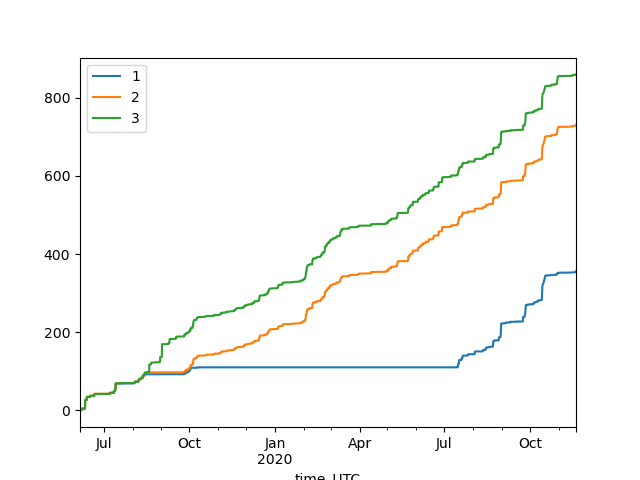

In [5]:
df_raw.cumsum().plot();

# Do combination of the three gauge time series

This combination excludes periods where individual gauges seem to produce erroneous results and averages the data of the remaining gauges.

In [6]:
df_combined = gauge_proc_tools.combine_gauges(
    df_three_gauges_R_1_min=df_raw*60,
    hours_to_average_for_diff=24,
    max_allowed_relative_diff=0.3,
    min_R=0.5,
    hours_to_average_for_zeros=1
)/60

In [7]:
df_combined

time_UTC
2019-06-05 11:22:00+00:00    0.066667
2019-06-05 11:23:00+00:00    0.133333
2019-06-05 11:24:00+00:00    0.066667
2019-06-05 11:25:00+00:00    0.000000
2019-06-05 11:26:00+00:00    0.000000
                               ...   
2020-11-19 14:58:00+00:00    0.000000
2020-11-19 14:59:00+00:00    0.333333
2020-11-19 15:00:00+00:00    0.333333
2020-11-19 15:01:00+00:00    0.533333
2020-11-19 15:02:00+00:00    0.133333
Length: 767741, dtype: float64

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
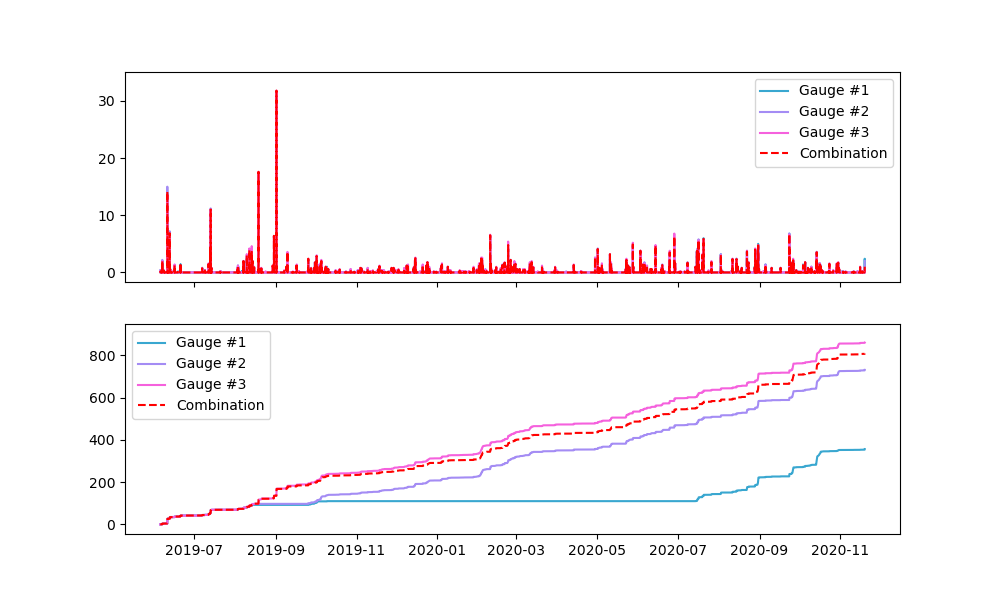

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
gauge_vis_tools.plot_three_gauges(df_three_gauges=df_raw.resample('H').sum(), df_gauge_combo=df_combined.resample('H').sum(), ax=axs[0])
gauge_vis_tools.plot_three_gauges(df_three_gauges=df_raw.resample('H').sum().cumsum(), df_gauge_combo=df_combined.resample('H').sum().cumsum(), ax=axs[1]);